Modelo Clasificación: Realimentado por los datos de la primera función.

Preprocesamiento de datos

In [2]:
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0
    
    def __eq__(self, value):
        if not isinstance(value, Column):
            return False
        return (
            self.usp_code == value.usp_code and
            self.particle_size == value.particle_size and
            self.temperature == value.temperature and
            self.flowrate == value.flowrate and
            self.t0 == value.t0
        )
    
    def __hash__(self):
        return hash((
            self.usp_code,
            self.particle_size,
            self.temperature,
            self.flowrate,
            self.t0
        ))
    
    def __repr__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"
    def __str__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"


class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna:Column):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

    def __eq__(self, value):
        if not isinstance(value, Config):
            return False
        return (
            self.eluyente1 == value.eluyente1 and
            self.eluyente2 == value.eluyente2 and
            self.ph1 == value.ph1 and
            self.ph2 == value.ph2 and
            self.eluyente_1_gradiente == value.eluyente_1_gradiente and
            self.eluyente_2_gradiente == value.eluyente_2_gradiente and
            self.t_gradiente == value.t_gradiente and
            self.columna == value.columna
        )
    
    def __hash__(self):
        return hash((
            self.eluyente1, 
            self.eluyente2, 
            self.ph1, 
            self.ph2, 
            tuple(self.eluyente_1_gradiente),  
            tuple(self.eluyente_2_gradiente),  
            tuple(self.t_gradiente),           
            self.columna
        ))
        
    def __repr__(self):
        return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
    
    def __str__(self):
            return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../../../data/output_funcion_1_gth_4.csv")

In [5]:
#df.columns = ["Class", "Eluent1", "Eluent2", "Ph1", "Ph2", "Eluent1_gradient", "Eluent2_gradient", "T_gradient", "Column_name", "USP_code", "Length", "Particle_size", "Temperature", "Flow", "T0", "Score", "N_data"]

In [6]:
from collections import defaultdict

configs_by_class = defaultdict(set)
classes = df['Clase'].unique()
configs_by_class = {clase: set() for clase in classes}

for i, row in df.iterrows():
    configs_by_class[row["Clase"]].add(
        Config(
            row["Eluyente1"],
            row["Eluyente2"],
            row["pH1"],
            row["pH2"],
            row["Eluyente1 Gradiente"],
            row["Eluyente2 Gradiente"],
            row["T Gradiente"], 
            Column(
                row["Columna Nombre"],
                row["USP Code"],
                row["Longitud"],
                row["Tamaño de Partícula"],
                row["Temperatura"],
                row["Flujo"],
                row["T0"]
            )
        )
    )


In [7]:
from collections import Counter

# Lista con la cantidad de configuraciones por clase
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Contar cuántas clases tienen menos de x configuraciones
conteo = {}
total_clases = len(n_configuraciones)  # Total de clases
for limite in range(4, 100): 
    conteo[f"< {limite}"] = sum(1 for n in n_configuraciones if n < limite)

# Mostrar los resultados en formato N/TOTAL
for k, v in conteo.items():
    print(f"Clases con {k} configuraciones: {v}/{total_clases}")



Clases con < 4 configuraciones: 100/137
Clases con < 5 configuraciones: 103/137
Clases con < 6 configuraciones: 104/137
Clases con < 7 configuraciones: 107/137
Clases con < 8 configuraciones: 107/137
Clases con < 9 configuraciones: 109/137
Clases con < 10 configuraciones: 109/137
Clases con < 11 configuraciones: 109/137
Clases con < 12 configuraciones: 109/137
Clases con < 13 configuraciones: 111/137
Clases con < 14 configuraciones: 111/137
Clases con < 15 configuraciones: 111/137
Clases con < 16 configuraciones: 111/137
Clases con < 17 configuraciones: 111/137
Clases con < 18 configuraciones: 111/137
Clases con < 19 configuraciones: 112/137
Clases con < 20 configuraciones: 112/137
Clases con < 21 configuraciones: 113/137
Clases con < 22 configuraciones: 115/137
Clases con < 23 configuraciones: 116/137
Clases con < 24 configuraciones: 119/137
Clases con < 25 configuraciones: 119/137
Clases con < 26 configuraciones: 121/137
Clases con < 27 configuraciones: 121/137
Clases con < 28 config

In [8]:
# Filtrar las clases con más de 9 configuraciones
clases_mayores_a_9 = [clase for clase, configs in configs_by_class.items() if len(configs) > 9]

# Mostrar los nombres de las clases
print(clases_mayores_a_9)


['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinoline

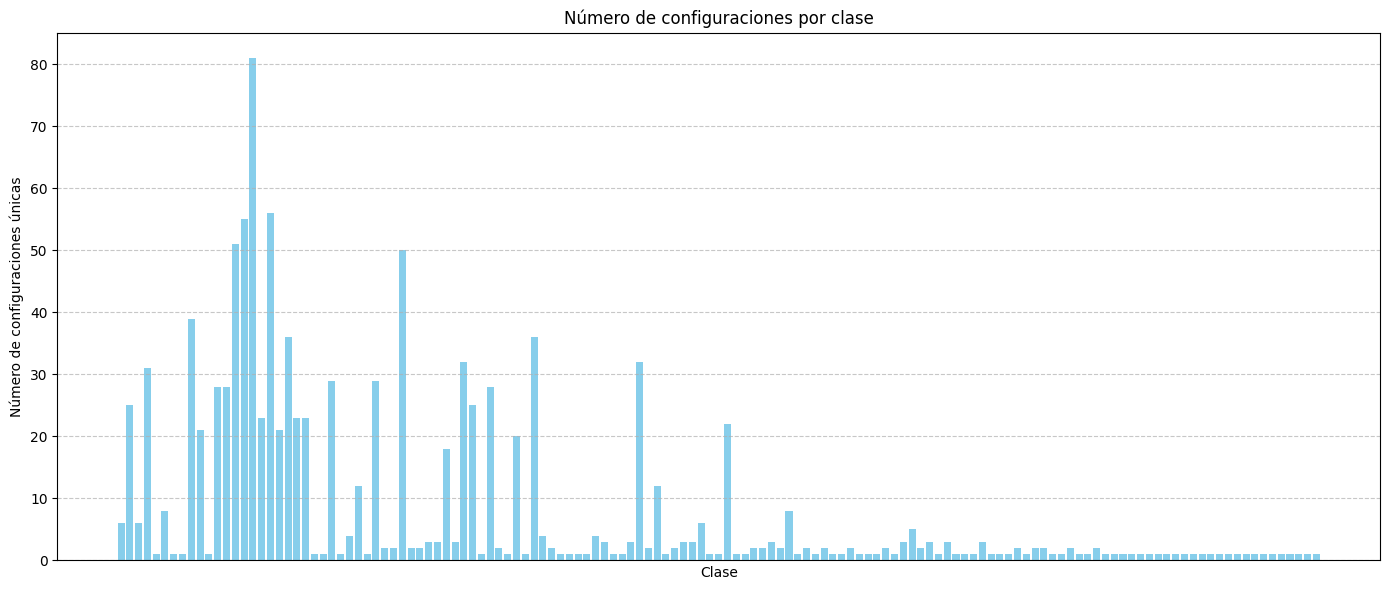

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(clase_nombres, n_configuraciones, color='skyblue')

# Ocultar todas las etiquetas de cada barra
plt.xticks([])

# Mantener solo la etiqueta del eje
plt.xlabel("Clase")
plt.ylabel("Número de configuraciones únicas")
plt.title("Número de configuraciones por clase")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


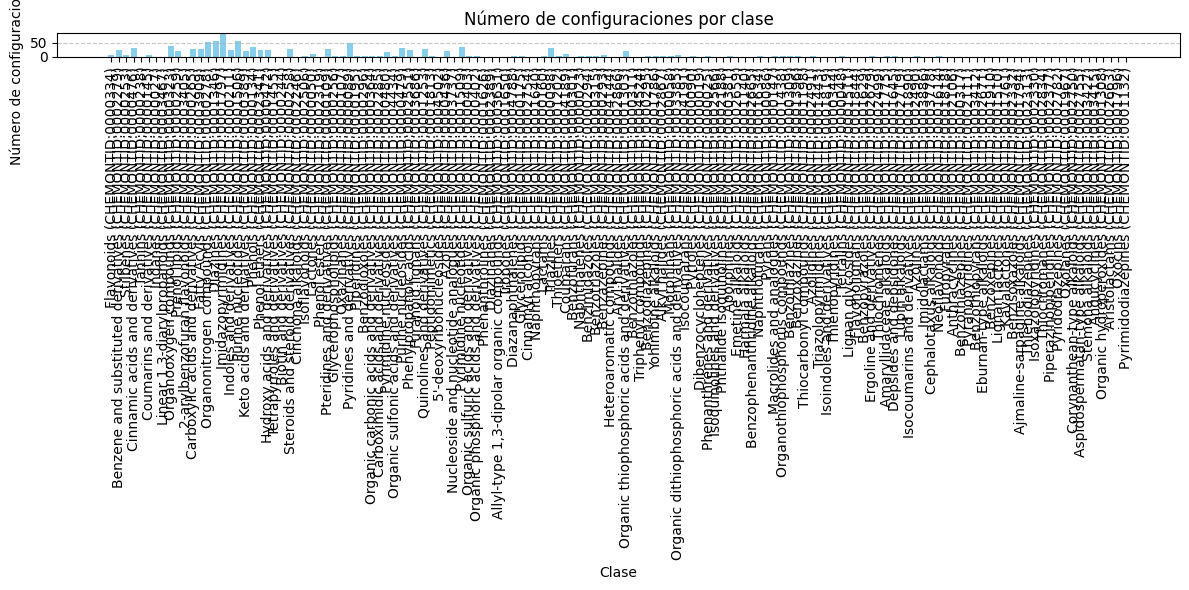

In [300]:
import matplotlib.pyplot as plt

# Preparar los datos
clase_nombres = list(configs_by_class.keys())
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(clase_nombres, n_configuraciones, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Número de configuraciones únicas")
plt.title("Número de configuraciones por clase")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [301]:
#['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinolines and derivatives (CHEMONTID:0001253)', 'Azoles (CHEMONTID:0000436)', 'Pyrimidine nucleotides (CHEMONTID:0001509)', 'Triazines (CHEMONTID:0000098)', 'Coumarans (CHEMONTID:0004189)', 'Organic thiophosphoric acids and derivatives (CHEMONTID:0001303)']
df_filtrado = df[df["Clase"].isin(clases_mayores_a_9)]


In [302]:
df_filtrado.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')

Evaluación de características

In [303]:
# Estadísticas descriptivas para las características numéricas
df_filtrado.describe()

# Contar valores nulos en las columnas
df_filtrado.isnull().sum()

# Contar clases para ver si hay desbalance
df_filtrado['Clase'].value_counts()


Clase
Imidazopyrimidines (CHEMONTID:0001797)                              164
Diazines (CHEMONTID:0001346)                                         90
Purine nucleotides (CHEMONTID:0001506)                               87
Organonitrogen compounds (CHEMONTID:0000278)                         83
Pyridines and derivatives (CHEMONTID:0000089)                        68
Organooxygen compounds (CHEMONTID:0000323)                           51
Triazines (CHEMONTID:0000098)                                        49
Pyrimidine nucleotides (CHEMONTID:0001509)                           46
Purine nucleosides (CHEMONTID:0000479)                               44
Steroids and steroid derivatives (CHEMONTID:0000258)                 43
Pteridines and derivatives (CHEMONTID:0000109)                       43
Phenols (CHEMONTID:0000134)                                          41
Cinnamic acids and derivatives (CHEMONTID:0000476)                   41
Quinolines and derivatives (CHEMONTID:0001253)            

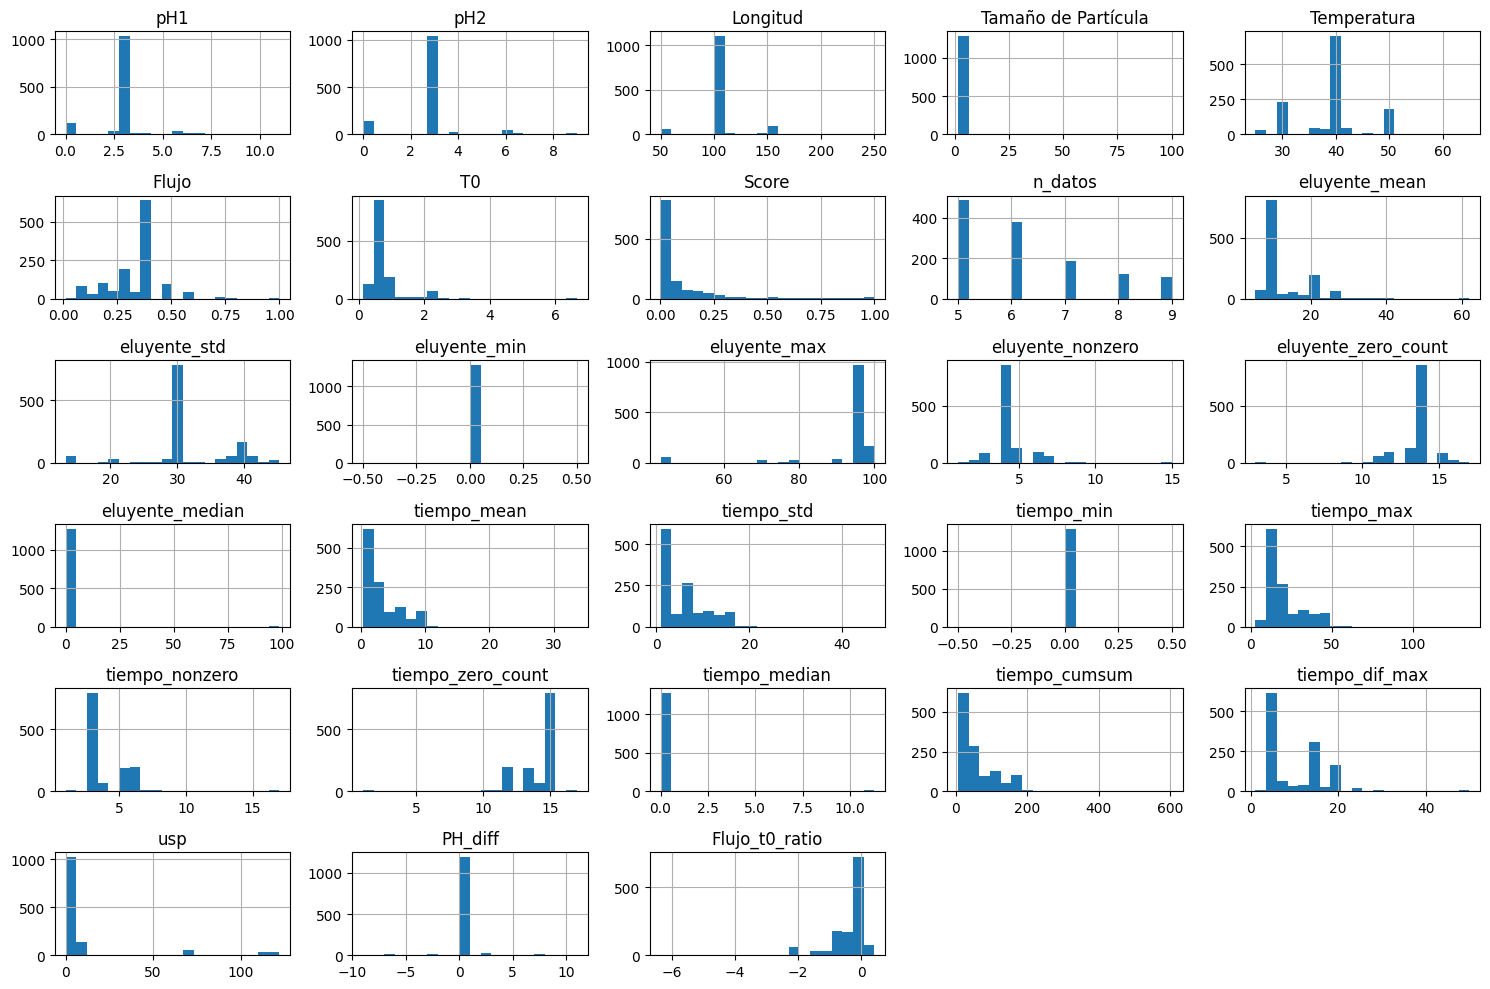

In [315]:
import matplotlib.pyplot as plt

# Graficar histograma de cada característica
#df_filtrado[['Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Columna Nombre', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']].hist(bins=20, figsize=(15, 10))
df_filtrado.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


Variables a utilizar:
* Clases
* ph_diff = ph1 - ph2
* flujo_t0_ratio = flujo / t0 (estimación del volumen muerto).
* Longitud
* Temperatura
* Tamaño de partícula
* Score


In [305]:
import numpy as np

def extraer_features_gradiente(grad):
    # Convertir el string en lista de floats
    valores = [float(x.strip()) for x in grad.split(",") if x.strip()]
    
    # Asegurarse de que la lista no esté vacía
    if len(valores) == 0:
        valores = [0.0] * 18  # Asignamos un valor por defecto si la lista está vacía
    
    # Calcular estadísticas del gradiente
    features = {
        "eluyente_mean": np.mean(valores),        # Promedio
        "eluyente_std": np.std(valores),          # Desviación estándar
        "eluyente_min": np.min(valores),          # Valor mínimo
        "eluyente_max": np.max(valores),          # Valor máximo
        "eluyente_nonzero": sum(1 for x in valores if x > 0),  # Cantidad de valores no cero
        "eluyente_zero_count": sum(1 for x in valores if x == 0),  # Cantidad de ceros
        "eluyente_median": np.median(valores)     # Mediana
    }
    
    return features

def extraer_features_tiempo(grad):
    # Convertir el string en lista de floats
    valores = [float(x.strip()) for x in grad.split(",") if x.strip()]
    
    # Asegurarse de que la lista no esté vacía
    if len(valores) == 0:
        valores = [0.0] * 18  # Asignamos un valor por defecto si la lista está vacía
    
    # Calcular estadísticas del tiempo
    features = {
        "tiempo_mean": np.mean(valores),           # Promedio del tiempo
        "tiempo_std": np.std(valores),             # Desviación estándar del tiempo
        "tiempo_min": np.min(valores),             # Tiempo mínimo
        "tiempo_max": np.max(valores),             # Tiempo máximo
        "tiempo_nonzero": sum(1 for x in valores if x > 0),  # Cantidad de valores no cero en el tiempo
        "tiempo_zero_count": sum(1 for x in valores if x == 0),  # Cantidad de ceros en el tiempo
        "tiempo_median": np.median(valores),       # Mediana del tiempo
        "tiempo_cumsum": np.cumsum(valores)[-1],   # Suma acumulada del tiempo
        "tiempo_dif_max": np.max(np.diff(valores)) # Diferencia máxima entre dos tiempos consecutivos
    }
    
    return features


In [306]:
# Aplicamos la función a las columnas del DataFrame
features_df_gradiente = df_filtrado["Eluyente1 Gradiente"].apply(extraer_features_gradiente).apply(pd.Series)
features_df_tiempo = df_filtrado["T Gradiente"].apply(extraer_features_tiempo).apply(pd.Series)

# Concatenamos las características al DataFrame original
df_filtrado = pd.concat([df_filtrado, features_df_gradiente, features_df_tiempo], axis=1)



In [307]:
print(df_filtrado.columns)

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos', 'eluyente_mean', 'eluyente_std', 'eluyente_min',
       'eluyente_max', 'eluyente_nonzero', 'eluyente_zero_count',
       'eluyente_median', 'tiempo_mean', 'tiempo_std', 'tiempo_min',
       'tiempo_max', 'tiempo_nonzero', 'tiempo_zero_count', 'tiempo_median',
       'tiempo_cumsum', 'tiempo_dif_max'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from functools import partial
from scipy.stats import skew, kurtosis

# Definir la función para extraer características
def extraer_features(grad, prefix):
    # Convertir el string en lista de floats
    valores = [float(x.strip()) for x in grad.split(",") if x.strip()]
    
    # Asegurarse de que la lista no esté vacía
    if len(valores) == 0:
        valores = [0.0] * 18  # Asignamos un valor por defecto si la lista está vacía
    
    # Calcular estadísticas del gradiente
    features = {
        f"{prefix}_mean": np.mean(valores),        # Promedio
        f"{prefix}_std": np.std(valores),          # Desviación estándar
        f"{prefix}_min": np.min(valores),          # Valor mínimo
        f"{prefix}_max": np.max(valores),          # Valor máximo
        f"{prefix}_nonzero": sum(1 for x in valores if x > 0),  # Cantidad de valores no cero
        f"{prefix}_zero_count": sum(1 for x in valores if x == 0),  # Cantidad de ceros
        f"{prefix}_median": np.median(valores),     # Mediana
        f"{prefix}_skew": skew(valores),           # Asimetría
        f"{prefix}_kurtosis": kurtosis(valores)    # Curtosis
    }
    
    return features


# Usamos partial para preconfigurar el prefix
extraer_features_eluyente = partial(extraer_features, prefix="eluyente")
extraer_features_t = partial(extraer_features, prefix="t")

# Aplicamos la función a las columnas del DataFrame
features_df = df_filtrado["Eluyente1 Gradiente"].apply(extraer_features_eluyente).apply(pd.Series)
features_df_2 = df_filtrado["T Gradiente"].apply(extraer_features_t).apply(pd.Series)

# Concatenamos las características al DataFrame original
df_filtrado = pd.concat([df_filtrado, features_df, features_df_2], axis=1)

# Ver el DataFrame resultante
print(df_filtrado.columns)


Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos', 'usp_mean', 'usp_std', 'usp_min', 'usp_max',
       'usp_nonzero', 'usp_zero_count', 'usp_median', 'PH_diff',
       'Flujo_t0_ratio', 'eluyente_mean', 'eluyente_std', 'eluyente_min',
       'eluyente_max', 'eluyente_nonzero', 'eluyente_zero_count',
       'eluyente_median', 't_mean', 't_std', 't_min', 't_max', 't_nonzero',
       't_zero_count', 't_median', 'eluyente_mean', 'eluyente_std',
       'eluyente_min', 'eluyente_max', 'eluyente_nonzero',
       'eluyente_zero_count', 'eluyente_median', 't_mean', 't_std', 't_min',
       't_max', 't_nonzero', 't_zero_count', 't_median'],
      dtype='object')


In [313]:
df_filtrado["PH_diff"] = df_filtrado["pH1"] - df_filtrado["pH2"]
df_filtrado["Flujo_t0_ratio"] = df_filtrado["Flujo"] - df_filtrado["T0"]

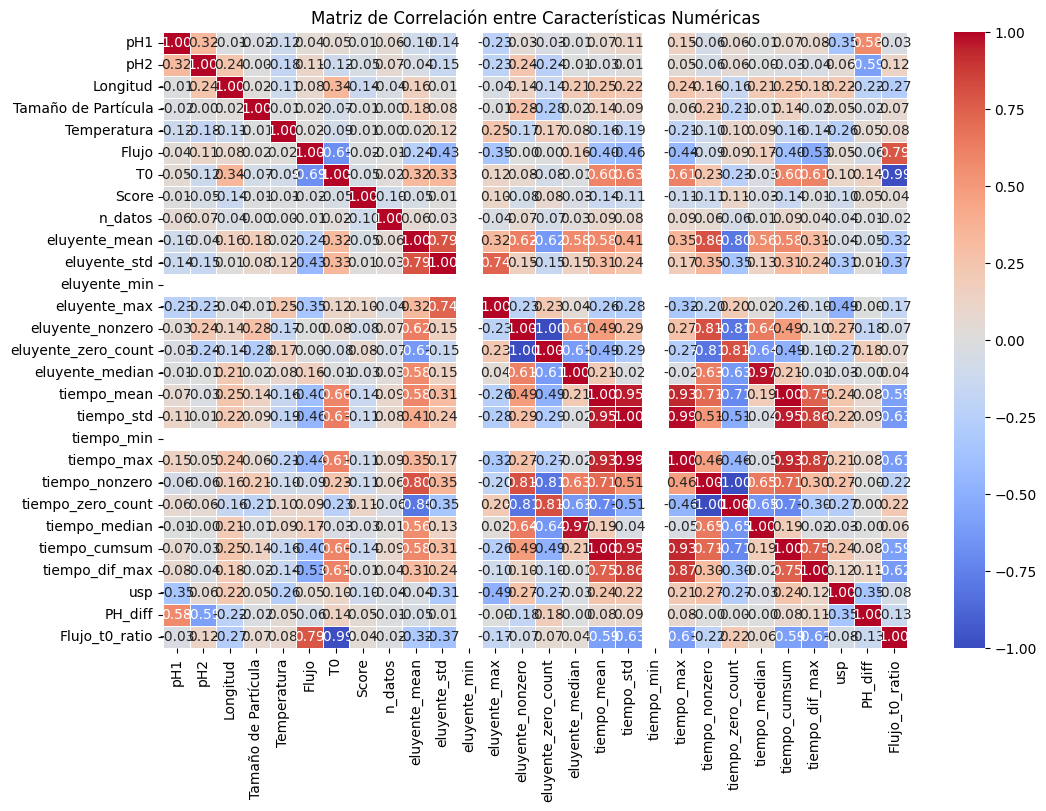

In [314]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para reemplazar el formato "column.usp.code_L1" por "1"
def reemplazar_usp_code(usp_code):
    if usp_code == "column.usp.code_0":
        return 0
    # Reemplazamos con la expresión regular y devolvemos el valor capturado
    return re.sub(r'.*_L(\w+)$', r'\1', usp_code)
    

df_filtrado["usp"] = df_filtrado["USP Code"].apply(lambda code: int(reemplazar_usp_code(code)))

# Asegúrate de seleccionar solo las columnas numéricas del dataframe
df_numerico = df_filtrado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numerico.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Características Numéricas')
plt.show()


Ingeniería de Características

In [285]:
df_filtrado.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos', 'usp_mean', 'usp_std', 'usp_min', 'usp_max',
       'usp_nonzero', 'usp_zero_count', 'usp_median', 'PH_diff',
       'Flujo_t0_ratio'],
      dtype='object')

In [286]:
#Variables a utilizar: [Clases, ph_diff = ph1 - ph2, flujo_t0_ratio = flujo / t0, Longitud, Temperatura, Tamaño de partícula, Score]
df_filtrado["PH_diff"] = df_filtrado["pH1"] - df_filtrado["pH2"]
df_filtrado["Flujo_t0_ratio"] = df_filtrado["Flujo"] - df_filtrado["T0"]

df_input = df_filtrado[["PH_diff", "Flujo_t0_ratio", "Clase", "Longitud", "Temperatura", "Tamaño de Partícula", "Score", "USP Code"]]


PROBANDO PCA

In [317]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que df_filtrado es tu DataFrame
# Asegúrate de seleccionar solo las columnas numéricas del DataFrame
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Estandarizar los datos para PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

# Aplicar PCA y reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=10)  # Puedes cambiar el número de componentes según lo necesites
df_pca = pca.fit_transform(df_scaled)

# Convertir el resultado en un DataFrame para su visualización
df_pca_df = pd.DataFrame(df_pca, columns=['1', '2', '3','4', '5', '6', '7', '8', '9', '10'])

# Ver las primeras filas de los componentes principales
print(df_pca_df.head())

# Explicar la varianza explicada por cada componente
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

# Visualización de los primeros dos componentes principales
#plt.figure(figsize=(8,6))
#plt.scatter(df_pca_df['PC1'], df_pca_df['PC2'], alpha=0.7)
#plt.title('Proyección en los primeros dos componentes principales')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.grid(True)
#plt.show()


          1         2         3         4         5         6         7  \
0  0.582718 -1.284994  1.175593  0.482416 -0.264737  1.696689  3.699185   
1  2.933286  0.741176  1.272832 -0.465534  1.139125  1.258862  1.037798   
2 -1.311953  1.580349  1.858500  2.149154 -2.538467  1.446420 -1.493788   
3 -0.705396 -0.699491 -0.218654  0.039391  0.120433 -0.404230  0.187019   
4 -2.069276  0.497316  0.202869 -0.032672  0.263503 -0.137064 -0.256922   

          8         9        10  
0 -3.964861  0.488819  1.636770  
1 -0.275394 -1.724823 -1.199277  
2 -0.944212 -0.465521 -0.726538  
3  0.473022  0.330590 -0.651696  
4  0.317408 -0.315269 -0.289132  
Varianza explicada por cada componente: [0.3154403  0.16267754 0.11259317 0.0739212  0.05651138 0.05021526
 0.04266888 0.03719698 0.03461169 0.03137382]
Varianza total explicada: 0.9172102211767393


Entrenamiento del modelo 2: (Configuración, Familia) -> (Score)

In [263]:
# Eliminar columnas irrelevantes
df_filtrado = df_filtrado.drop(columns=["n_datos"], errors="ignore")


In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# ---------- 1. Funciones de gradiente ----------
def parse_gradient_column(col_str):
    try:
        return np.array([float(v) for v in str(col_str).split(",") if v.strip() != ""])
    except:
        return np.array([0.0])  # En caso de error, devuelve algo neutro

def extract_gradient_features(col_str, prefix):
    values = parse_gradient_column(col_str)
    return {
        f"{prefix}_mean": np.mean(values),
        f"{prefix}_std": np.std(values),
        f"{prefix}_min": np.min(values),
        f"{prefix}_max": np.max(values),
        f"{prefix}_range": np.max(values) - np.min(values),
        f"{prefix}_slope": (values[-1] - values[0]) / len(values) if len(values) > 1 else 0.0
    }

# ---------- 2. Extraer features ----------
def preprocess_dataframe(df):
    # Separar objetivo
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Gradiente features
    gradiente_cols = {
        "Eluyente1 Gradiente": "e1g",
        "Eluyente2 Gradiente": "e2g",
        "T Gradiente": "tg"
    }

    gradiente_features = []
    for col, prefix in gradiente_cols.items():
        extracted = X[col].apply(lambda x: extract_gradient_features(x, prefix))
        gradiente_df = pd.DataFrame(list(extracted))
        gradiente_features.append(gradiente_df)

    # Concatenar con otras columnas
    X = X.drop(columns=gradiente_cols.keys()).reset_index(drop=True)

    # Asegurarse de que todos los gradiente_features tengan índices limpios
    gradiente_features = [df.reset_index(drop=True) for df in gradiente_features]

    # Concatenar
    X = pd.concat([X] + gradiente_features, axis=1)

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 3. Aplicar el pipeline ----------
X_processed, y, encoder = preprocess_dataframe(df_filtrado)

# ---------- 4. Train / Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------- 5. Modelo LightGBM ----------
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# ---------- 6. Evaluación ----------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 25
[LightGBM] [Info] Start training from score 0.094956
RMSE: 0.1334


Con Ingeniería de Características

In [ ]:
#['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente','Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code','Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0','Score', 'n_datos', 'usp_mean', 'usp_std', 'usp_min', 'usp_max','usp_nonzero', 'usp_zero_count', 'usp_median', 'PH_diff','Flujo_t0_ratio']
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# ---------- 1. Funciones de gradiente ----------
def parse_gradient_column(col_str):
    try:
        return np.array([float(v) for v in str(col_str).split(",") if v.strip() != ""])
    except:
        return np.array([0.0])  # En caso de error, devuelve algo neutro

def extract_gradient_features(col_str, prefix):
    values = parse_gradient_column(col_str)
    return {
        f"{prefix}_mean": np.mean(values),
        f"{prefix}_std": np.std(values),
        f"{prefix}_min": np.min(values),
        f"{prefix}_max": np.max(values),
        f"{prefix}_range": np.max(values) - np.min(values),
        f"{prefix}_slope": (values[-1] - values[0]) / len(values) if len(values) > 1 else 0.0
    }

# ---------- 2. Extraer features ----------
def preprocess_dataframe(df):
    # Separar objetivo
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Gradiente features
    gradiente_cols = {
        "Eluyente1 Gradiente": "e1g",
        "Eluyente2 Gradiente": "e2g",
        "T Gradiente": "tg"
    }

    gradiente_features = []
    for col, prefix in gradiente_cols.items():
        extracted = X[col].apply(lambda x: extract_gradient_features(x, prefix))
        gradiente_df = pd.DataFrame(list(extracted))
        gradiente_features.append(gradiente_df)

    # Concatenar con otras columnas
    X = X.drop(columns=gradiente_cols.keys()).reset_index(drop=True)

    # Asegurarse de que todos los gradiente_features tengan índices limpios
    gradiente_features = [df.reset_index(drop=True) for df in gradiente_features]

    # Concatenar
    X = pd.concat([X] + gradiente_features, axis=1)

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 3. Aplicar el pipeline ----------
X_processed, y, encoder = preprocess_dataframe(df_input)

# ---------- 4. Train / Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------- 5. Modelo LightGBM ----------
model2 = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model2.fit(X_train, y_train)

# ---------- 6. Evaluación ----------
y_pred = model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

In [244]:
def predecir_score(config, clase, model, encoder):
    def extraer_features_gradiente(grad_str, prefix):
        values = [float(v.strip()) for v in grad_str.split(",") if v.strip()]
        arr = np.array(values, dtype=np.float32)
        return {
            f"{prefix}_mean": np.mean(arr),
            f"{prefix}_std": np.std(arr),
            f"{prefix}_min": np.min(arr),
            f"{prefix}_max": np.max(arr),
            f"{prefix}_range": np.max(arr) - np.min(arr),
            f"{prefix}_slope": (arr[-1] - arr[0]) / len(arr) if len(arr) > 1 else 0.0
        }

    # Construir el diccionario de entrada como en df_filter
    data = {
        "Clase": clase,
        "Eluyente1": config.eluyente1,
        "Eluyente2": config.eluyente2,
        "pH1": config.ph1,
        "pH2": config.ph2,
        "Columna Nombre": config.columna.name,
        "USP Code": config.columna.usp_code,
        "Longitud": config.columna.length,
        "Tamaño de Partícula": config.columna.particle_size,
        "Temperatura": config.columna.temperature,
        "Flujo": config.columna.flowrate,
        "T0": config.columna.t0,
    }

    # Agregar features de los gradientes
    data.update(extraer_features_gradiente(config.eluyente_1_gradiente, "e1g"))
    data.update(extraer_features_gradiente(config.eluyente_2_gradiente, "e2g"))
    data.update(extraer_features_gradiente(config.t_gradiente, "tg"))

    df_pred = pd.DataFrame([data])

    # Codificación categórica (orden y columnas iguales a entrenamiento)
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    df_pred[cat_cols] = encoder.transform(df_pred[cat_cols])

    # Predecir
    prediction = model.predict(df_pred)[0]
    return prediction


In [ ]:
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
configuraciones = df_filtrado.apply(create_config, axis=1)

In [250]:
def buscar_clase_con_score_maximo(configuraciones, df):
    """Busca la clase con el Score más alto para cada configuración en el DataFrame.
    Devuelve una lista de tuplas (config, clase, score_maximo).
    """
    resultados = []
    
    for config in configuraciones:
        # Filtrar el DataFrame para las filas que coincidan con la configuración
        filtro = (
            (df['Eluyente1'] == config.eluyente1) &
            (df['Eluyente2'] == config.eluyente2) &
            (df['pH1'] == config.ph1) &
            (df['pH2'] == config.ph2) &
            (df['Eluyente1 Gradiente'] == config.eluyente_1_gradiente) &
            (df['Eluyente2 Gradiente'] == config.eluyente_2_gradiente) &
            (df['T Gradiente'] == config.t_gradiente) &
            (df['Longitud'] == config.columna.length) &
            (df['Tamaño de Partícula'] == config.columna.particle_size) &
            (df['Temperatura'] == config.columna.temperature) &
            (df['Flujo'] == config.columna.flowrate) &
            (df['T0'] == config.columna.t0)
        )
        
        df_filtrado = df[filtro]
        
        if not df_filtrado.empty:
            fila_max_score = df_filtrado.loc[df_filtrado['Score'].idxmax()]
            clase = fila_max_score['Clase']
            score_maximo = fila_max_score['Score']
        else:
            clase = None
            score_maximo = None
        
        resultados.append((config, clase, score_maximo))
    
    return resultados


In [267]:
config_clase_score = buscar_clase_con_score_maximo(configuraciones=configuraciones, df=df_filtrado)


In [266]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     model,
     encoder) #0.8426919316255497, en la realidad es 1.0

0.6753313746134468

In [268]:
config_clase_score

[(Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.acn 0, ph1=3.0, ph2=3.0, eluyente_1_gradiente=95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, columna=Column(name=Agilent ZORBAX Extend-C18, usp_code=column.usp.code_L1, length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
  'Benzene and substituted derivatives (CHEMONTID:0002279)',
  1.0),
 (Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.meoh 0, ph1=3.61, ph2=3.61, eluyente_1_gradiente=99.0, 99.0, 61.0, 0.01, 0.01, 99.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=1.0, 1.0, 39.0, 99.9, 99.9, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 1.0, 2.0, 13.0, 15.0, 15.1, 20.1, 

In [269]:
diff = []
for config, clase, score_real in config_clase_score:
    if isinstance(clase, pd.Series):
        clase = clase.iloc[0]
    if isinstance(score_real, pd.Series):
        score_real = score_real.iloc[0]  # O .mean(), o max(), dependiendo de tu lógica

    if score_real is not None and clase is not None:
        score_predicho = predecir_score(config, clase, model, encoder)
        diferencia = score_real - score_predicho
        diff.append(diferencia)
    else:
        diff.append(None)





In [270]:
diff

[0.32466862538655317,
 0.33841123374800375,
 0.49704008159182156,
 0.12872206722415586,
 0.041366594863203265,
 0.041366594863203265,
 0.11869936967181449,
 0.11869936967181449,
 0.41191379183568144,
 0.47729528141729954,
 0.5800597993047694,
 0.22819257968584772,
 0.9094966279373926,
 0.24940040709353584,
 0.6547536691062592,
 -0.0008624576250030724,
 0.09561766802667404,
 0.5994527114635719,
 0.36479479169209583,
 0.060381389098495164,
 0.03262746508472336,
 0.07423952372095871,
 0.0538163168020038,
 0.06897152036503362,
 0.24940040709353584,
 0.256055231430122,
 -0.0260016414099061,
 0.5800597993047694,
 0.025845999297191058,
 0.09561766802667404,
 0.041366594863203265,
 0.031011916297639358,
 -0.09476352669230886,
 -0.06880273020053426,
 0.32466862538655317,
 0.020185994163232364,
 0.053001824099976766,
 0.11869936967181449,
 0.053001824099976766,
 0.11869936967181449,
 0.056896383113505894,
 -0.09476352669230886,
 0.11737036270288193,
 -0.034325360788789186,
 0.02272535212130909,


Entrenamiento del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Asumimos que 'Score' está en el DataFrame y se puede usar como peso.
# Usamos 'Score' como el peso para cada muestra
sample_weights = df['Score']

# Dividir el dataset en características (X) y etiquetas (y)
X = df[['Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 
        'T Gradiente', 'Columna Nombre', 'USP Code', 'Longitud', 'Tamaño de Partícula', 
        'Temperatura', 'Flujo', 'T0']]
y = df['Clase']

# Inicializar el modelo de RandomForest con ponderación de instancias
clf = RandomForestClassifier()

# Entrenar el modelo con los pesos de las muestras
clf.fit(X, y, sample_weight=sample_weights)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente','Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code','Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0','Score', 'n_datos']

# Convertir las variables categóricas en variables numéricas
df['Eluyente1'] = df['Eluyente1'].astype('category').cat.codes
df['Eluyente2'] = df['Eluyente2'].astype('category').cat.codes
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].astype('category').cat.codes
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].astype('category').cat.codes
df['T Gradiente'] = df['T Gradiente'].astype('category').cat.codes
df['Columna Nombre'] = df['Columna Nombre'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['USP Code'] = df['USP Code'].astype('category').cat.codes
df['Score'] = df['Score'].astype('category').cat.codes

# Extraer las características (X) y la variable objetivo (y)
X = df.drop('Clase', axis=1)  # Eliminar la columna 'Clase' de las características
y = df['Clase']  # Columna objetivo: 'Clase'

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Ver la importancia de las características
importancia = rf_model.feature_importances_
print("\nImportancia de las características:", importancia)



Precisión del modelo: 0.25333333333333335

Reporte de clasificación:
                                                                     precision    recall  f1-score   support

                       5'-deoxyribonucleosides (CHEMONTID:0004502)       0.00      0.00      0.00         1
                                 Alkyl halides (CHEMONTID:0002867)       0.00      0.00      0.00         1
      Allyl-type 1,3-dipolar organic compounds (CHEMONTID:0003631)       0.00      0.00      0.00         0
                      Amaryllidaceae alkaloids (CHEMONTID:0001775)       0.00      0.00      0.00         1
                                    Aporphines (CHEMONTID:0000381)       0.00      0.00      0.00         0
                                        Azoles (CHEMONTID:0000436)       0.33      0.20      0.25         5
                                    Azolidines (CHEMONTID:0002491)       0.00      0.00      0.00         1
                                      Azolines (CHEMONTID:0002490

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Entrenamiento del modelo de Clasificación de una configuración en un familia

In [60]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)


# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'Columna Nombre', 'USP Code', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([
        [
            config.eluyente1, config.eluyente2, config.ph1, config.ph2, 
            config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
            config.columna.name, config.columna.usp_code, config.columna.length, 
            config.columna.particle_size, config.columna.temperature, config.columna.flowrate, config.columna.t0
        ]
    ])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


ValueError: could not convert string to float: 'h2o'

In [61]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)

# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'Columna Nombre', 'USP Code', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([[
        le.transform([config.eluyente1])[0], le.transform([config.eluyente2])[0], config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        config.columna.name, config.columna.usp_code, config.columna.length, 
        config.columna.particle_size, config.columna.temperature, config.columna.flowrate, config.columna.t0
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


ValueError: setting an array element with a sequence.

In [62]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)

# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))


# Reemplazar las columnas de gradientes por su valor medio
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'Columna Nombre', 'USP Code', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([[ 
        le.transform([config.eluyente1])[0], le.transform([config.eluyente2])[0], config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        config.columna.name, config.columna.usp_code, config.columna.length, 
        config.columna.particle_size, config.columna.temperature, config.columna.flowrate, config.columna.t0
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


ValueError: could not convert string to float: 'Waters CORTECS UPLC C18'

In [65]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Función para reemplazar el formato "column.usp.code_L1" por "L1"
def reemplazar_usp_code(usp_code):
    return re.sub(r'.*_(\w+)$', r'\1', usp_code)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)
df['USP Code'] = df['USP Code'].apply(reemplazar_usp_code)

# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))


# Reemplazar las columnas de gradientes por su valor medio
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'USP Code', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]  # Excluimos 'Columna Nombre'

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([[ 
        le.transform([config.eluyente1])[0], le.transform([config.eluyente2])[0], config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        config.columna.usp_code, config.columna.length, config.columna.particle_size, 
        config.columna.temperature, config.columna.flowrate, config.columna.t0  # 'Columna Nombre' no está aquí
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


ValueError: could not convert string to float: 'L1'

In [67]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Función para reemplazar el formato "column.usp.code_L1" por "L1"
def reemplazar_usp_code(usp_code):
    return re.sub(r'.*_(\w+)$', r'\1', usp_code)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)

# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))))


# Reemplazar las columnas de gradientes por su valor medio
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Convertir 'USP Code' y 'Columna Nombre' a valores numéricos
df['USP Code_encoded'] = le.fit_transform(df['USP Code'])
df['Columna Nombre_encoded'] = le.fit_transform(df['Columna Nombre'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'USP Code_encoded', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]  # Excluimos 'Columna Nombre'

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([[ 
        le.transform([config.eluyente1])[0], le.transform([config.eluyente2])[0], config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        le.transform([config.columna.usp_code])[0], config.columna.length, config.columna.particle_size, 
        config.columna.temperature, config.columna.flowrate, config.columna.t0
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")

Clasificación:


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Number of classes, 10, does not match size of target_names, 15. Try specifying the labels parameter

In [68]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    # Expresión regular para extraer el nombre del compuesto
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Función para reemplazar el formato "column.usp.code_L1" por "L1"
def reemplazar_usp_code(usp_code):
    return re.sub(r'.*_(\w+)$', r'\1', usp_code)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)

# Preprocesar las columnas de configuración
# Convertir las columnas de gradientes (Eluyente1 Gradiente, Eluyente2 Gradiente, etc.) a listas de valores numéricos
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else x)
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else x)
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else x)

# Reemplazar las columnas de gradientes por su valor medio
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Convertir 'USP Code' y 'Columna Nombre' a valores numéricos
df['USP Code_encoded'] = le.fit_transform(df['USP Code'])
df['Columna Nombre_encoded'] = le.fit_transform(df['Columna Nombre'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'USP Code_encoded', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]  # Excluimos 'Columna Nombre'

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Clasificación:")
# Solución 1: Especificar labels en classification_report
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=le.classes_[np.unique(y_test)]))

# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler):
    # Preprocesar la configuración
    config_data = np.array([[ 
        le.transform([config.eluyente1])[0], le.transform([config.eluyente2])[0], config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        le.transform([config.columna.usp_code])[0], config.columna.length, config.columna.particle_size, 
        config.columna.temperature, config.columna.flowrate, config.columna.t0
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


Clasificación:
                                    precision    recall  f1-score   support

Merck Supelco Ascentis Express C18       0.00      0.00      0.00         1
            Phenomenex Kinetex C18       0.17      1.00      0.29         1
            Restek Raptor Biphenyl       0.00      0.00      0.00         1
   Thermo Scientific Hypersil GOLD       0.00      0.00      0.00         3
     Waters ACQUITY UPLC BEH Amide       0.50      0.50      0.50         2
       Waters ACQUITY UPLC BEH C18       0.00      0.00      0.00         2
     Waters ACQUITY UPLC BEH HILIC       0.00      0.00      0.00         2
       Waters ACQUITY UPLC HSS C18       0.00      0.00      0.00         4

                         micro avg       0.18      0.12      0.15        16
                         macro avg       0.08      0.19      0.10        16
                      weighted avg       0.07      0.12      0.08        16



c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs

ValueError: y contains previously unseen labels: 'h2o'

In [71]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Leer el dataset
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Función para reemplazar el formato "eluent.X.compound Y" por "compound"
def reemplazar_eluyente(eluyente):
    return re.sub(r'eluent\.\d+\.(\w+)\s+\d+', r'\1', eluyente)

# Función para reemplazar el formato "column.usp.code_L1" por "L1"
def reemplazar_usp_code(usp_code):
    return re.sub(r'.*_(\w+)$', r'\1', usp_code)

# Aplicar la función de reemplazo a las columnas relevantes del DataFrame
df['Eluyente1'] = df['Eluyente1'].apply(reemplazar_eluyente)
df['Eluyente2'] = df['Eluyente2'].apply(reemplazar_eluyente)

# Preprocesar las columnas de configuración
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else np.array([float(x)]))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else np.array([float(x)]))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else np.array([float(x)]))

# Reemplazar las columnas de gradientes por su valor medio
df['Eluyente1 Gradiente'] = df['Eluyente1 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['Eluyente2 Gradiente'] = df['Eluyente2 Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))
df['T Gradiente'] = df['T Gradiente'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else float(x))

# Definir la clase Column y Config para estructurar las configuraciones
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0

    def __repr__(self):
        return f"Column(name={self.name}, usp_code={self.usp_code}, particle_size={self.particle_size}, temperature={self.temperature}, flowrate={self.flowrate}, t0={self.t0})"
    
class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

# Crear configuraciones a partir del dataset
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
df['Config'] = df.apply(create_config, axis=1)

# Convertir las columnas de texto como 'Clase' en números
le = LabelEncoder()

# Convertir las columnas 'Eluyente1' y 'Eluyente2' a números con LabelEncoder
df['Eluyente1_encoded'] = le.fit_transform(df['Eluyente1'])
df['Eluyente2_encoded'] = le.fit_transform(df['Eluyente2'])

# Convertir la columna 'Clase' a números
df['Clase_encoded'] = le.fit_transform(df['Clase'])

# Convertir 'USP Code' y 'Columna Nombre' a valores numéricos
df['USP Code_encoded'] = le.fit_transform(df['USP Code'])
df['Columna Nombre_encoded'] = le.fit_transform(df['Columna Nombre'])

# Obtener las características (configuración) y la etiqueta (familia/clase)
X = df[['Eluyente1_encoded', 'Eluyente2_encoded', 'pH1', 'pH2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 
        'USP Code_encoded', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']]  # Excluimos 'Columna Nombre'

y = df['Clase_encoded']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal (MLP)
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Evaluación del modelo
#print("Clasificación:")
#print(classification_report(y_test, y_pred, target_names=le.classes_))
# Evaluación del modelo
#print("Clasificación:")
#print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_[:len(np.unique(y_test))]]))

print("Clasificación:")
# Usamos las clases únicas presentes en y_test
target_names = [str(cls) for cls in np.unique(y_test)]

# Especificamos las clases a evaluar
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=target_names))



# Hacer predicción con el modelo
def predict_family(config, model=clf, scaler=scaler, encoder=le):
    # Preprocesar la configuración
    eluyente1_encoded = encoder.transform([config.eluyente1])[0] if config.eluyente1 in encoder.classes_ else -1
    eluyente2_encoded = encoder.transform([config.eluyente2])[0] if config.eluyente2 in encoder.classes_ else -1
    usp_code_encoded = encoder.transform([config.columna.usp_code])[0] if config.columna.usp_code in encoder.classes_ else -1

    config_data = np.array([[ 
        eluyente1_encoded, eluyente2_encoded, config.ph1, config.ph2, 
        config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente, 
        usp_code_encoded, config.columna.length, config.columna.particle_size, 
        config.columna.temperature, config.columna.flowrate, config.columna.t0
    ]])
    
    # Escalar los datos
    config_data_scaled = scaler.transform(config_data)
    
    # Obtener la probabilidad de pertenencia a cada clase
    probs = clf.predict_proba(config_data_scaled)
    
    # Devolver la clase con la mayor probabilidad
    predicted_class_index = np.argmax(probs)
    predicted_class = le.classes_[predicted_class_index]
    confidence = probs[0, predicted_class_index]
    
    return predicted_class, confidence

# Ejemplo de uso:
config_example = df['Config'].iloc[0]
predicted_family, confidence = predict_family(config_example)

print(f"Predicción para la configuración: {predicted_family}, Confianza: {confidence}")


Clasificación:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.17      1.00      0.29         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4

   micro avg       0.18      0.12      0.15        16
   macro avg       0.08      0.19      0.10        16
weighted avg       0.07      0.12      0.08        16

Predicción para la configuración: Phenomenex Kinetex XB-C18, Confianza: 0.9686753069302632


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmora\AppData\Local\Programs

DE AQUI A ABAJO NO HACER CASO

Librerías:

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer



In [8]:
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

In [10]:
print(df.columns)

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')


In [40]:
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):#id, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        #self.id = id
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0
    
    def __eq__(self, value):
        if not isinstance(value, Column):
            return False
        return (
            #self.name == value.name and
            self.usp_code == value.usp_code and
            #self.length == value.length and
            #self.id == value.id and
            self.particle_size == value.particle_size and
            self.temperature == value.temperature and
            self.flowrate == value.flowrate and
            self.t0 == value.t0
        )
    
    def __hash__(self):
        return hash((
            #self.name,
            self.usp_code,
            #self.length,
            #self.id,
            self.particle_size,
            self.temperature,
            self.flowrate,
            self.t0
        ))
    
    def __repr__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"
    def __str__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"


class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna:Column):#gradiente, columna:Column):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        #self.gradiente = gradiente
        self.columna = columna

    def __eq__(self, value):
        if not isinstance(value, Config):
            return False
        return (
            self.eluyente1 == value.eluyente1 and
            self.eluyente2 == value.eluyente2 and
            self.ph1 == value.ph1 and
            self.ph2 == value.ph2 and
            self.eluyente_1_gradiente == value.eluyente_1_gradiente and
            self.eluyente_2_gradiente == value.eluyente_2_gradiente and
            self.t_gradiente == value.t_gradiente and
            #self.gradiente == value.gradiente and
            self.columna == value.columna
        )
    
    #def __hash__(self):
    #    return hash((self.eluyente1, self.eluyente2, self.ph1, self.ph2, self.eluyente_1_gradiente, self.eluyente_2_gradiente, self.t_gradiente, self.columna))#self.gradiente, self.columna))
    def __hash__(self):
        return hash((
            self.eluyente1, 
            self.eluyente2, 
            self.ph1, 
            self.ph2, 
            tuple(self.eluyente_1_gradiente),  
            tuple(self.eluyente_2_gradiente),  
            tuple(self.t_gradiente),           
            self.columna
        ))
        
    def __repr__(self):
        return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    #f"gradiente={self.gradiente},"
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "#id={self.columna.id}, 
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
    
    def __str__(self):
            return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    #f"gradiente={self.gradiente},"
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "#id={self.columna.id}, 
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
            #return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
            #        f"ph1={self.ph1}, ph2={self.ph2}, "
            #        f"gradiente={self.gradiente}, "
            #        f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
            #        f"length={self.columna.length}, "#id={self.columna.id}, 
            #        f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
            #        f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar datos
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

def procesar_gradiente(gradiente):
    """Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas."""
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

# Aplicar la conversión a las columnas de gradiente
df[['Eluyente1_Mean', 'Eluyente1_Std', 'Eluyente1_Max', 'Eluyente1_Min']] = df['Eluyente1 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
df[['Eluyente2_Mean', 'Eluyente2_Std', 'Eluyente2_Max', 'Eluyente2_Min']] = df['Eluyente2 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
df[['T_Mean', 'T_Std', 'T_Max', 'T_Min']] = df['T Gradiente'].apply(procesar_gradiente).apply(pd.Series)

# Eliminar columnas no numéricas
columnas_a_eliminar = ['Columna Nombre', 'n_datos', 'Eluyente1', 'Eluyente2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 'USP Code']
df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

# Convertir columnas numéricas
columnas_numericas = ['pH1', 'pH2', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0', 'Score']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar características y variable objetivo
X = df.drop(columns=['Clase'])
y = df['Clase']

# Verificar que solo queden columnas numéricas
print(X.dtypes)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo con Score como una característica clave
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

def predecir_familia(config: Config):
    """Preprocesa una configuración de tipo Config y predice la familia correspondiente."""
    
    # Extraemos las propiedades de 'Config'
    pH1, pH2 = config.ph1, config.ph2
    eluyente1_gradiente = config.eluyente_1_gradiente
    eluyente2_gradiente = config.eluyente_2_gradiente
    t_gradiente = config.t_gradiente
    
    # Accedemos a las propiedades de la columna
    columna = config.columna
    longitud = columna.length
    tamano_particula = columna.particle_size
    temperatura = columna.temperature
    flujo = columna.flowrate
    t0 = columna.t0
    
    # Procesamos los gradientes
    eluyente1_stats = procesar_gradiente(eluyente1_gradiente)
    eluyente2_stats = procesar_gradiente(eluyente2_gradiente)
    t_stats = procesar_gradiente(t_gradiente)
    
    # Creamos el vector de características para la predicción
    datos_procesados = np.array([pH1, pH2] + eluyente1_stats + eluyente2_stats + t_stats +
                                 [longitud, tamano_particula, temperatura, flujo, t0]).reshape(1, -1)
    
    # Escalamos los datos
    datos_procesados = scaler.transform(datos_procesados)
    
    # Realizamos la predicción
    return modelo.predict(datos_procesados)[0]


pH1                    float64
pH2                    float64
Longitud               float64
Tamaño de Partícula    float64
Temperatura            float64
Flujo                  float64
T0                     float64
Score                  float64
Eluyente1_Mean         float64
Eluyente1_Std          float64
Eluyente1_Max          float64
Eluyente1_Min          float64
Eluyente2_Mean         float64
Eluyente2_Std          float64
Eluyente2_Max          float64
Eluyente2_Min          float64
T_Mean                 float64
T_Std                  float64
T_Max                  float64
T_Min                  float64
dtype: object


In [42]:
def crear_configuraciones(df):
    """Crea una lista de objetos Config a partir de un DataFrame."""
    configuraciones = []
    
    for _, fila in df.iterrows():
        # Crear el objeto 'Column' para la fila actual
        columna = Column(
            name=fila['Columna Nombre'],
            usp_code=fila['USP Code'],
            length=fila['Longitud'],
            particle_size=fila['Tamaño de Partícula'],
            temperature=fila['Temperatura'],
            flowrate=fila['Flujo'],
            t0=fila['T0']
        )
        
        # Crear el objeto 'Config' para la fila actual
        config = Config(
            eluyente1=fila['Eluyente1'],
            eluyente2=fila['Eluyente2'],
            ph1=fila['pH1'],
            ph2=fila['pH2'],
            eluyente_1_gradiente=fila['Eluyente1 Gradiente'],
            eluyente_2_gradiente=fila['Eluyente2 Gradiente'],
            t_gradiente=fila['T Gradiente'],
            columna=columna
        )
        
        # Añadir el objeto 'Config' a la lista
        configuraciones.append(config)
    
    return configuraciones


In [43]:
def buscar_clase_con_score_maximo(configuraciones, df):
    """Busca la clase con el Score más alto para cada configuración en el DataFrame."""
    clases_predichas = []
    
    for config in configuraciones:
        # Filtrar el DataFrame para las filas que coincidan con la configuración
        filtro = (
            (df['Eluyente1'] == config.eluyente1) &
            (df['Eluyente2'] == config.eluyente2) &
            (df['pH1'] == config.ph1) &
            (df['pH2'] == config.ph2) &
            (df['Eluyente1 Gradiente'] == config.eluyente_1_gradiente) &
            (df['Eluyente2 Gradiente'] == config.eluyente_2_gradiente) &
            (df['T Gradiente'] == config.t_gradiente) &
            (df['Longitud'] == config.columna.length) &
            (df['Tamaño de Partícula'] == config.columna.particle_size) &
            (df['Temperatura'] == config.columna.temperature) &
            (df['Flujo'] == config.columna.flowrate) &
            (df['T0'] == config.columna.t0)
        )
        
        # Filtrar el DataFrame con las configuraciones coincidentes
        df_filtrado = df[filtro]
        
        if not df_filtrado.empty:
            # Obtener la fila con el Score más alto
            fila_max_score = df_filtrado.loc[df_filtrado['Score'].idxmax()]
            # Obtener la clase correspondiente al Score máximo
            clase = fila_max_score['Clase']
        else:
            # Si no hay coincidencias, podemos asignar un valor nulo o 'No encontrada'
            clase = None
        
        # Agregar la clase a la lista de resultados
        clases_predichas.append((config, clase))
    
    return clases_predichas


In [55]:
def predecir_clases_por_modelo(configuraciones):
    """Devuelve una lista de clases predichas por el modelo de clasificación para cada configuración."""
    clases_predichas = []
    
    for config in configuraciones:
        # Extraer características de la configuración
        pH1, pH2 = config.ph1, config.ph2
        eluyente1_gradiente = config.eluyente_1_gradiente
        eluyente2_gradiente = config.eluyente_2_gradiente
        t_gradiente = config.t_gradiente
        columna = config.columna
        longitud = columna.length
        tamano_particula = columna.particle_size
        temperatura = columna.temperature
        flujo = columna.flowrate
        t0 = columna.t0
        
        # Procesar los gradientes
        eluyente1_stats = procesar_gradiente(eluyente1_gradiente)
        eluyente2_stats = procesar_gradiente(eluyente2_gradiente)
        t_stats = procesar_gradiente(t_gradiente)
        
        # Crear el vector de características
        datos_procesados = np.array([pH1, pH2] + eluyente1_stats + eluyente2_stats + t_stats +
                                     [longitud, tamano_particula, temperatura, flujo, t0]).reshape(1, -1)
        
        # Escalar los datos
        datos_procesados = scaler.transform(datos_procesados)
        
        # Predecir la clase utilizando el modelo
        clase_predicha = modelo.predict(datos_procesados)[0]
        
        # Añadir la clase predicha a la lista
        clases_predichas.append(clase_predicha)
    
    return clases_predichas


In [56]:
def imprimir_clase_comparada(configuraciones, df):
    """Imprime para cada configuración: la configuración, la clase del DataFrame y la clase predicha por el modelo."""
    
    # Primero, obtenemos las clases del DataFrame con el método 'buscar_clase_con_score_maximo'
    clases_df = buscar_clase_con_score_maximo(configuraciones, df)
    
    # Luego, obtenemos las clases predichas por el modelo
    clases_predichas = predecir_clases_por_modelo(configuraciones)
    
    # Imprimir la configuración, la clase según el df y la clase predicha por el modelo
    for (config, clase_df), clase_predicha in zip(clases_df, clases_predichas):
        print(f"Configuración: {config}")
        print(f"  Clase según el DataFrame: {clase_df}")
        print(f"  Clase predicha por el modelo: {clase_predicha}")
        print("-" * 50)


In [57]:
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

In [53]:
df.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')

In [58]:
imprimir_clase_comparada(crear_configuraciones(df), df)

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 19 features, but StandardScaler is expecting 20 features as input.

De aquí a abajo es pura guarreria

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar datos
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

def procesar_gradiente(gradiente):
    """Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas."""
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

# Aplicar la conversión a las columnas de gradiente
df[['Eluyente1_Mean', 'Eluyente1_Std', 'Eluyente1_Max', 'Eluyente1_Min']] = df['Eluyente1 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
df[['Eluyente2_Mean', 'Eluyente2_Std', 'Eluyente2_Max', 'Eluyente2_Min']] = df['Eluyente2 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
df[['T_Mean', 'T_Std', 'T_Max', 'T_Min']] = df['T Gradiente'].apply(procesar_gradiente).apply(pd.Series)

# Eliminar columnas no numéricas
columnas_a_eliminar = ['Columna Nombre', 'n_datos', 'Eluyente1', 'Eluyente2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 'USP Code']
df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

# Convertir columnas numéricas
columnas_numericas = ['pH1', 'pH2', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0', 'Score']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar características y variable objetivo
X = df.drop(columns=['Clase'])
y = df['Clase']

# Verificar que solo queden columnas numéricas
print(X.dtypes)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo con Score como una característica clave
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

def predecir_familia(config):
    """Preprocesa una configuración en formato de texto y predice la familia correspondiente."""
    elementos = config.split(',')
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    score = float(elementos[14])

    datos_procesados = np.array([pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente +
                                 [longitud, tamano_particula, temperatura, flujo, t0, score]).reshape(1, -1)
    datos_procesados = scaler.transform(datos_procesados)
    return modelo.predict(datos_procesados)[0]




pH1                    float64
pH2                    float64
Longitud               float64
Tamaño de Partícula    float64
Temperatura            float64
Flujo                  float64
T0                     float64
Score                  float64
Eluyente1_Mean         float64
Eluyente1_Std          float64
Eluyente1_Max          float64
Eluyente1_Min          float64
Eluyente2_Mean         float64
Eluyente2_Std          float64
Eluyente2_Max          float64
Eluyente2_Min          float64
T_Mean                 float64
T_Std                  float64
T_Max                  float64
T_Min                  float64
dtype: object


In [22]:
import numpy as np
import pandas as pd

def procesar_gradiente(gradiente):
    """
    Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas relevantes.
    """
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

def preprocesar_configuracion(config):
    """
    Procesa una configuración dada en formato de texto y la transforma en el formato adecuado para el modelo.
    """
    elementos = config.split(',')
    eluyente1, eluyente2 = elementos[0], elementos[1]
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    usp_code = elementos[8]
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    score = float(elementos[14])
    
    return [pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente + [longitud, tamano_particula, temperatura, flujo, t0, score]

def buscar_familia_con_mayor_score(df, config):
    """
    Busca en el DataFrame (df) la configuración que más se asemeja a la configuración proporcionada
    y devuelve la familia con el mayor score.
    """
    # Preprocesar la configuración proporcionada
    datos_procesados = np.array(preprocesar_configuracion(config))
    
    # Inicializar variables
    max_score = -float('inf')  # Para encontrar el máximo score
    familia_con_max_score = None
    
    # Recorrer las filas del DataFrame y comparar
    for index, row in df.iterrows():
        # Procesar las configuraciones de la fila
        config_row = [
            row['pH1'], row['pH2'],
            row['Eluyente1_Mean'], row['Eluyente1_Std'], row['Eluyente1_Max'], row['Eluyente1_Min'],
            row['Eluyente2_Mean'], row['Eluyente2_Std'], row['Eluyente2_Max'], row['Eluyente2_Min'],
            row['T_Mean'], row['T_Std'], row['T_Max'], row['T_Min'],
            row['Longitud'], row['Tamaño de Partícula'], row['Temperatura'], row['Flujo'], row['T0'],
            row['Score']
        ]
        
        # Calcular la diferencia entre la configuración actual y la configuración proporcionada
        diferencia = np.abs(np.array(config_row) - datos_procesados)
        
        # Usamos la suma de las diferencias absolutas como una medida de "similitud"
        similitud = np.sum(diferencia)
        
        # Si esta configuración es más similar y tiene un score mayor, la guardamos
        if similitud < max_score:
            max_score = similitud
            familia_con_max_score = row['Clase']
    
    return familia_con_max_score


In [27]:
import numpy as np
import pandas as pd

def procesar_gradiente(gradiente):
    """
    Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas relevantes.
    """
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

def preprocesar_configuracion(config):
    """
    Procesa una configuración dada en formato de texto y la transforma en el formato adecuado para el modelo.
    """
    elementos = config.split(',')
    eluyente1, eluyente2 = elementos[0], elementos[1]
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    usp_code = elementos[8]
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    
    return [pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente + [longitud, tamano_particula, temperatura, flujo, t0]

def buscar_familia_con_mayor_score(df, config):
    """
    Busca en el DataFrame (df) la configuración que más se asemeja a la configuración proporcionada
    y devuelve la familia con el mayor score, sin tener en cuenta el score en la comparación.
    """
    # Preprocesar la configuración proporcionada
    datos_procesados = np.array(preprocesar_configuracion(config))
    
    # Inicializar variables
    min_diferencia = float('inf')  # Para encontrar la mínima diferencia
    familia_con_max_score = None
    
    # Recorrer las filas del DataFrame y comparar
    for index, row in df.iterrows():
        # Procesar las configuraciones de la fila (sin incluir 'Score')
        config_row = [
            row['pH1'], row['pH2'],
            row['Eluyente1_Mean'], row['Eluyente1_Std'], row['Eluyente1_Max'], row['Eluyente1_Min'],
            row['Eluyente2_Mean'], row['Eluyente2_Std'], row['Eluyente2_Max'], row['Eluyente2_Min'],
            row['T_Mean'], row['T_Std'], row['T_Max'], row['T_Min'],
            row['Longitud'], row['Tamaño de Partícula'], row['Temperatura'], row['Flujo'], row['T0']
        ]
        
        # Calcular la diferencia entre la configuración actual y la configuración proporcionada
        diferencia = np.abs(np.array(config_row) - datos_procesados)
        
        # Usamos la suma de las diferencias absolutas como una medida de "similitud"
        similitud = np.sum(diferencia)
        
        # Si esta configuración es más similar, actualizamos la mejor coincidencia
        if similitud < min_diferencia:
            min_diferencia = similitud
            familia_con_max_score = row['Clase']
    
    return familia_con_max_score

In [30]:
import numpy as np

def procesar_gradiente(gradiente):
    """
    Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas relevantes.
    """
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

def generar_configuraciones(df):
    """
    Genera una lista con configuraciones en el formato de texto solicitado para cada fila en el DataFrame.
    """
    configuraciones = []

    for index, row in df.iterrows():
        # Obtener valores necesarios de cada columna
        eluyente1 = row['Eluyente1']
        eluyente2 = row['Eluyente2']
        pH1 = row['pH1']
        pH2 = row['pH2']
        
        # Procesar gradientes
        eluyente1_gradiente = procesar_gradiente(row['Eluyente1 Gradiente'])
        eluyente2_gradiente = procesar_gradiente(row['Eluyente2 Gradiente'])
        t_gradiente = procesar_gradiente(row['T Gradiente'])
        
        # Otros valores
        usp_code = row['USP Code']
        longitud = row['Longitud']
        tamano_particula = row['Tamaño de Partícula']
        temperatura = row['Temperatura']
        flujo = row['Flujo']
        t0 = row['T0']
        score = row['Score']
        
        # Crear la configuración en el formato solicitado
        config = f"{eluyente1} {eluyente2}, {pH1}, {pH2}," \
                 f" {', '.join(map(str, eluyente1_gradiente))}," \
                 f" {', '.join(map(str, eluyente2_gradiente))}," \
                 f" {', '.join(map(str, t_gradiente))}," \
                 f" {usp_code}, {longitud}, {tamano_particula}, {temperatura}, {flujo}," \
                 f" {t0}, {score}"

        configuraciones.append(config)

    return configuraciones


# Cargar datos
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Ejemplo de uso con el DataFrame df:
configuraciones = generar_configuraciones(df)

# Mostrar las configuraciones generadas
for config in configuraciones:
    print(config)


eluent.1.h2o 0 eluent.2.meoh 0, 3.0, 3.0, 10.61111111111111, 29.836385111859812, 95.0, 0.0, 11.61111111111111, 31.1124999689994, 99.5, 0.0, 0.9744444444444446, 2.6399794237881276, 10.01, 0.0, column.usp.code_L1, 100.0, 1.6, 40.0, 0.4, 0.55125, 0.5365310611834041
eluent.1.h2o 0 eluent.2.meoh 0, 7.0, 0.0, 21.11111111111111, 39.495272415947156, 95.0, 0.0, 12.222222222222221, 31.101188893952006, 100.0, 0.0, 6.949999999999999, 12.49792204950709, 35.0, 0.0, column.usp.code_L1, 100.0, 1.7, 40.54166666666666, 0.2, 1.1025, 0.5342687904458907
eluent.1.h2o 0 eluent.2.acn 0, 3.0, 3.0, 10.61111111111111, 29.836385111859812, 95.0, 0.0, 11.61111111111111, 31.1124999689994, 99.5, 0.0, 0.9744444444444446, 2.6399794237881276, 10.01, 0.0, column.usp.code_L1, 100.0, 1.8, 30.0, 0.4, 0.55125, 0.4311704640046961
eluent.1.h2o 0 eluent.2.meoh 0, 3.0, 3.0, 22.22222222222222, 41.5739709641549, 100.0, 0.0, 11.11111111111111, 31.42696805273544, 100.0, 0.0, 6.949999999999999, 12.49792204950709, 35.0, 0.0, column.us

In [32]:
import numpy as np
import pandas as pd

def procesar_gradiente(gradiente):
    """
    Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas relevantes.
    """
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

def preprocesar_configuracion(config):
    """
    Procesa una configuración dada en formato de texto y la transforma en el formato adecuado para el modelo.
    """
    elementos = config.split(',')
    eluyente1, eluyente2 = elementos[0], elementos[1]
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    usp_code = elementos[8]
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    
    return [pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente + [longitud, tamano_particula, temperatura, flujo, t0]

def generar_configuraciones(df):
    """
    Genera una lista con configuraciones en el formato de texto solicitado para cada fila en el DataFrame.
    """
    configuraciones = []

    for index, row in df.iterrows():
        # Obtener valores necesarios de cada columna
        eluyente1 = row['Eluyente1']
        eluyente2 = row['Eluyente2']
        pH1 = row['pH1']
        pH2 = row['pH2']
        
        # Procesar gradientes
        eluyente1_gradiente = procesar_gradiente(row['Eluyente1 Gradiente'])
        eluyente2_gradiente = procesar_gradiente(row['Eluyente2 Gradiente'])
        t_gradiente = procesar_gradiente(row['T Gradiente'])
        
        # Otros valores
        usp_code = row['USP Code']
        longitud = row['Longitud']
        tamano_particula = row['Tamaño de Partícula']
        temperatura = row['Temperatura']
        flujo = row['Flujo']
        t0 = row['T0']
        score = row['Score']
        
        # Crear la configuración en el formato solicitado
        config = f"{eluyente1} {eluyente2}, {pH1}, {pH2}," \
                 f" {', '.join(map(str, eluyente1_gradiente))}," \
                 f" {', '.join(map(str, eluyente2_gradiente))}," \
                 f" {', '.join(map(str, t_gradiente))}," \
                 f" {usp_code}, {longitud}, {tamano_particula}, {temperatura}, {flujo}," \
                 f" {t0}, {score}"

        configuraciones.append(config)

    return configuraciones

# Cargar datos (ajusta la ruta a tu archivo CSV)
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Verifica las columnas del DataFrame
print(df.columns)

# Generar las configuraciones
configuraciones = generar_configuraciones(df)

# Mostrar las configuraciones generadas
for config in configuraciones:
    print(config)


Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')
eluent.1.h2o 0 eluent.2.meoh 0, 3.0, 3.0, 10.61111111111111, 29.836385111859812, 95.0, 0.0, 11.61111111111111, 31.1124999689994, 99.5, 0.0, 0.9744444444444446, 2.6399794237881276, 10.01, 0.0, column.usp.code_L1, 100.0, 1.6, 40.0, 0.4, 0.55125, 0.5365310611834041
eluent.1.h2o 0 eluent.2.meoh 0, 7.0, 0.0, 21.11111111111111, 39.495272415947156, 95.0, 0.0, 12.222222222222221, 31.101188893952006, 100.0, 0.0, 6.949999999999999, 12.49792204950709, 35.0, 0.0, column.usp.code_L1, 100.0, 1.7, 40.54166666666666, 0.2, 1.1025, 0.5342687904458907
eluent.1.h2o 0 eluent.2.acn 0, 3.0, 3.0, 10.61111111111111, 29.836385111859812, 95.0, 0.0, 11.61111111111111, 31.1124999689994, 99.5, 0.0, 0.9744444444444446, 2.6399794237881276, 10.01,

In [33]:

# Configuración que proporcionaste
#config = "eluent.1.h2o 0,eluent.2.meoh 0,3.0,3.0,"\
#         "95.0, 95.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,"\
#         "5.0, 5.0, 99.5, 99.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,"\
#         "0.0, 1.12, 6.41, 10.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,"\
#         "Waters CORTECS UPLC C18,column.usp.code_L1,100.0,1.6,40.0,0.4,0.55125,0.5365310611834041"
for config in configuraciones:
    print(config)
    familia_predicha = predecir_familia(config)
    familia_bbdd = buscar_familia_con_mayor_score(df, config)
    print(f"La familia predicha es: {familia_predicha}. La familia con el mayor score es: {familia_bbdd}")

# Realizar la predicción con el modelo
#familia_predicha = predecir_familia(config)
#familia_bbdd = buscar_familia_con_mayor_score(df, config)

# Mostrar la familia predicha
#print("La familia predicha es:", familia_predicha)
#print("La familia con el mayor score es:", familia_bbdd)

eluent.1.h2o 0 eluent.2.meoh 0, 3.0, 3.0, 10.61111111111111, 29.836385111859812, 95.0, 0.0, 11.61111111111111, 31.1124999689994, 99.5, 0.0, 0.9744444444444446, 2.6399794237881276, 10.01, 0.0, column.usp.code_L1, 100.0, 1.6, 40.0, 0.4, 0.55125, 0.5365310611834041


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


KeyError: 'Eluyente1_Mean'

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar datos
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:", df.columns)

# Función para procesar los gradientes
def procesar_gradiente(gradiente):
    """Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas."""
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

# Verificar si las columnas 'Eluyente1 Gradiente', 'Eluyente2 Gradiente' y 'T Gradiente' existen
if 'Eluyente1 Gradiente' in df.columns:
    df[['Eluyente1_Mean', 'Eluyente1_Std', 'Eluyente1_Max', 'Eluyente1_Min']] = df['Eluyente1 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'Eluyente1 Gradiente' no está presente en el DataFrame.")

if 'Eluyente2 Gradiente' in df.columns:
    df[['Eluyente2_Mean', 'Eluyente2_Std', 'Eluyente2_Max', 'Eluyente2_Min']] = df['Eluyente2 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'Eluyente2 Gradiente' no está presente en el DataFrame.")

if 'T Gradiente' in df.columns:
    df[['T_Mean', 'T_Std', 'T_Max', 'T_Min']] = df['T Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'T Gradiente' no está presente en el DataFrame.")

# Verificar si las columnas 'Eluyente1', 'Eluyente2', etc. están presentes antes de acceder a ellas
if 'Eluyente1' not in df.columns or 'Eluyente2' not in df.columns:
    print("Las columnas 'Eluyente1' o 'Eluyente2' no están presentes en el DataFrame.")
else:
    print("Las columnas 'Eluyente1' y 'Eluyente2' están presentes.")

# Eliminar columnas no numéricas
columnas_a_eliminar = ['Columna Nombre', 'n_datos', 'Eluyente1', 'Eluyente2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 'USP Code']
df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

# Convertir columnas numéricas
columnas_numericas = ['pH1', 'pH2', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0', 'Score']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar características y variable objetivo
X = df.drop(columns=['Clase'])
y = df['Clase']

# Verificar que solo queden columnas numéricas
print(X.dtypes)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo con Score como una característica clave
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Función para predecir la familia dada una configuración
def predecir_familia(config):
    """Preprocesa una configuración en formato de texto y predice la familia correspondiente."""
    elementos = config.split(',')
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    score = float(elementos[14])

    datos_procesados = np.array([pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente +
                                 [longitud, tamano_particula, temperatura, flujo, t0, score]).reshape(1, -1)
    datos_procesados = scaler.transform(datos_procesados)
    return modelo.predict(datos_procesados)[0]

# Función para buscar la familia con el mayor score
def buscar_familia_con_mayor_score(df, config):
    """
    Busca en el DataFrame (df) la configuración que más se asemeja a la configuración proporcionada
    y devuelve la familia con el mayor score, sin tener en cuenta el score en la comparación.
    """
    # Preprocesar la configuración proporcionada
    datos_procesados = np.array(preprocesar_configuracion(config))
    
    # Inicializar variables
    min_diferencia = float('inf')  # Para encontrar la mínima diferencia
    familia_con_max_score = None
    
    # Recorrer las filas del DataFrame y comparar
    for index, row in df.iterrows():
        # Procesar las configuraciones de la fila (sin incluir 'Score')
        config_row = [
            row['pH1'], row['pH2'],
            row['Eluyente1_Mean'], row['Eluyente1_Std'], row['Eluyente1_Max'], row['Eluyente1_Min'],
            row['Eluyente2_Mean'], row['Eluyente2_Std'], row['Eluyente2_Max'], row['Eluyente2_Min'],
            row['T_Mean'], row['T_Std'], row['T_Max'], row['T_Min'],
            row['Longitud'], row['Tamaño de Partícula'], row['Temperatura'], row['Flujo'], row['T0']
        ]
        
        # Calcular la diferencia entre la configuración actual y la configuración proporcionada
        diferencia = np.abs(np.array(config_row) - datos_procesados)
        
        # Usamos la suma de las diferencias absolutas como una medida de "similitud"
        similitud = np.sum(diferencia)
        
        # Si esta configuración es más similar, actualizamos la mejor coincidencia
        if similitud < min_diferencia:
            min_diferencia = similitud
            familia_con_max_score = row['Clase']
    
    return familia_con_max_score

# Generar configuraciones a partir del DataFrame
def generar_configuraciones(df):
    """
    Genera una lista con configuraciones en el formato de texto solicitado para cada fila en el DataFrame.
    """
    configuraciones = []

    for index, row in df.iterrows():
        # Verificar que las columnas necesarias estén presentes
        if 'Eluyente1' in row and 'Eluyente2' in row and 'pH1' in row and 'pH2' in row:
            eluyente1 = row['Eluyente1']
            eluyente2 = row['Eluyente2']
            pH1 = row['pH1']
            pH2 = row['pH2']

            # Procesar gradientes
            eluyente1_gradiente = procesar_gradiente(row['Eluyente1 Gradiente'])
            eluyente2_gradiente = procesar_gradiente(row['Eluyente2 Gradiente'])
            t_gradiente = procesar_gradiente(row['T Gradiente'])

            # Otros valores
            usp_code = row['USP Code']
            longitud = row['Longitud']
            tamano_particula = row['Tamaño de Partícula']
            temperatura = row['Temperatura']
            flujo = row['Flujo']
            t0 = row['T0']
            score = row['Score']

            # Crear la configuración en el formato solicitado
            config = f"{eluyente1} {eluyente2}, {pH1}, {pH2}," \
                     f" {', '.join(map(str, eluyente1_gradiente))}," \
                     f" {', '.join(map(str, eluyente2_gradiente))}," \
                     f" {', '.join(map(str, t_gradiente))}," \
                     f" {usp_code}, {longitud}, {tamano_particula}, {temperatura}, {flujo}," \
                     f" {t0}, {score}"

            configuraciones.append(config)
        else:
            print(f"Fila {index} omitada debido a falta de columnas necesarias.")

    return configuraciones

# Generar las configuraciones
configuraciones = generar_configuraciones(df)

# Mostrar las configuraciones generadas
for config in configuraciones:
    print(config)
    familia_predicha = predecir_familia(config)
    familia_bbdd = buscar_familia_con_mayor_score(df, config)
    print(f"La familia predicha es: {familia_predicha}. La familia con el mayor score es: {familia_bbdd}")


Columnas del DataFrame: Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')
Las columnas 'Eluyente1' y 'Eluyente2' están presentes.
pH1                    float64
pH2                    float64
Longitud               float64
Tamaño de Partícula    float64
Temperatura            float64
Flujo                  float64
T0                     float64
Score                  float64
Eluyente1_Mean         float64
Eluyente1_Std          float64
Eluyente1_Max          float64
Eluyente1_Min          float64
Eluyente2_Mean         float64
Eluyente2_Std          float64
Eluyente2_Max          float64
Eluyente2_Min          float64
T_Mean                 float64
T_Std                  float64
T_Max                  float64
T_Min                  float64
dtype: object
Fila Purin

In [37]:
# Generar las configuraciones
configuraciones = generar_configuraciones(df)

# Mostrar las configuraciones generadas
for config in configuraciones:
    print(config)
    familia_predicha = predecir_familia(config)
    familia_bbdd = buscar_familia_con_mayor_score(df, config)
    print(f"La familia predicha es: {familia_predicha}. La familia con el mayor score es: {familia_bbdd}")

Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Purine nucleotides (CHEMONTID:0001506) omitada debido a falta de columnas necesarias.
Fila Pyrimidine nucleosides (CHEMONTID:0000480) omitada debido a falta de columnas necesarias.
Fila Pyrimidine nucleosides (CHEMONTID:0000480) omitada debido a falta de columnas necesarias.
Fila Pyrimidine nucleosides (CHEMONTID:0000480) omitada debido a falta de columnas necesarias.
Fila Pyrimidine nucleosides (CHEMONTID:0000480) omitada debido a falta de colu

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar datos
df = pd.read_csv("../../../tmp/resultados_cada_clase/alpha_ttotal_10_mejores_sqrt_2.csv")

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:", df.columns)

# Función para procesar los gradientes
def procesar_gradiente(gradiente):
    """Convierte una cadena de valores separados por comas en una lista de números y extrae estadísticas."""
    valores = np.array([float(x) for x in gradiente.split(',')])
    return [np.mean(valores), np.std(valores), np.max(valores), np.min(valores)]

# Verificar si las columnas 'Eluyente1 Gradiente', 'Eluyente2 Gradiente' y 'T Gradiente' existen
if 'Eluyente1 Gradiente' in df.columns:
    df[['Eluyente1_Mean', 'Eluyente1_Std', 'Eluyente1_Max', 'Eluyente1_Min']] = df['Eluyente1 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'Eluyente1 Gradiente' no está presente en el DataFrame.")

if 'Eluyente2 Gradiente' in df.columns:
    df[['Eluyente2_Mean', 'Eluyente2_Std', 'Eluyente2_Max', 'Eluyente2_Min']] = df['Eluyente2 Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'Eluyente2 Gradiente' no está presente en el DataFrame.")

if 'T Gradiente' in df.columns:
    df[['T_Mean', 'T_Std', 'T_Max', 'T_Min']] = df['T Gradiente'].apply(procesar_gradiente).apply(pd.Series)
else:
    print("La columna 'T Gradiente' no está presente en el DataFrame.")

# Verificar si las columnas 'Eluyente1', 'Eluyente2', etc. están presentes antes de acceder a ellas
if 'Eluyente1' not in df.columns or 'Eluyente2' not in df.columns:
    print("Las columnas 'Eluyente1' o 'Eluyente2' no están presentes en el DataFrame.")
else:
    print("Las columnas 'Eluyente1' y 'Eluyente2' están presentes.")

# Eliminar columnas no numéricas
columnas_a_eliminar = ['Columna Nombre', 'n_datos', 'Eluyente1', 'Eluyente2', 'Eluyente1 Gradiente', 'Eluyente2 Gradiente', 'T Gradiente', 'USP Code']
df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

# Convertir columnas numéricas
columnas_numericas = ['pH1', 'pH2', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0', 'Score']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar características y variable objetivo
X = df.drop(columns=['Clase'])
y = df['Clase']

# Verificar que solo queden columnas numéricas
print(X.dtypes)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo con Score como una característica clave
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Función para predecir la familia dada una configuración
def predecir_familia(config):
    """Preprocesa una configuración en formato de texto y predice la familia correspondiente."""
    elementos = config.split(',')
    pH1, pH2 = float(elementos[2]), float(elementos[3])
    eluyente1_gradiente = procesar_gradiente(elementos[4])
    eluyente2_gradiente = procesar_gradiente(elementos[5])
    t_gradiente = procesar_gradiente(elementos[6])
    longitud = float(elementos[9])
    tamano_particula = float(elementos[10])
    temperatura = float(elementos[11])
    flujo = float(elementos[12])
    t0 = float(elementos[13])
    score = float(elementos[14])

    datos_procesados = np.array([pH1, pH2] + eluyente1_gradiente + eluyente2_gradiente + t_gradiente +
                                 [longitud, tamano_particula, temperatura, flujo, t0, score]).reshape(1, -1)
    datos_procesados = scaler.transform(datos_procesados)
    return modelo.predict(datos_procesados)[0]

# Función para buscar la familia con el mayor score
def buscar_familia_con_mayor_score(df, config):
    """
    Busca en el DataFrame (df) la configuración que más se asemeja a la configuración proporcionada
    y devuelve la familia con el mayor score, sin tener en cuenta el score en la comparación.
    """
    # Preprocesar la configuración proporcionada
    datos_procesados = np.array(preprocesar_configuracion(config))
    
    # Inicializar variables
    min_diferencia = float('inf')  # Para encontrar la mínima diferencia
    familia_con_max_score = None
    
    # Recorrer las filas del DataFrame y comparar
    for index, row in df.iterrows():
        # Procesar las configuraciones de la fila (sin incluir 'Score')
        config_row = [
            row['pH1'], row['pH2'],
            row['Eluyente1_Mean'], row['Eluyente1_Std'], row['Eluyente1_Max'], row['Eluyente1_Min'],
            row['Eluyente2_Mean'], row['Eluyente2_Std'], row['Eluyente2_Max'], row['Eluyente2_Min'],
            row['T_Mean'], row['T_Std'], row['T_Max'], row['T_Min'],
            row['Longitud'], row['Tamaño de Partícula'], row['Temperatura'], row['Flujo'], row['T0']
        ]
        
        # Calcular la diferencia entre la configuración actual y la configuración proporcionada
        diferencia = np.abs(np.array(config_row) - datos_procesados)
        
        # Usamos la suma de las diferencias absolutas como una medida de "similitud"
        similitud = np.sum(diferencia)
        
        # Si esta configuración es más similar, actualizamos la mejor coincidencia
        if similitud < min_diferencia:
            min_diferencia = similitud
            familia_con_max_score = row['Clase']
    
    return familia_con_max_score

# Generar configuraciones a partir del DataFrame
def generar_configuraciones(df):
    """
    Genera una lista con configuraciones en el formato de texto solicitado para cada fila en el DataFrame.
    """
    configuraciones = []

    for index, row in df.iterrows():
        # Verificar que las columnas necesarias estén presentes
        if 'Eluyente1' in row and 'Eluyente2' in row and 'pH1' in row and 'pH2' in row:
            eluyente1 = row['Eluyente1']
            eluyente2 = row['Eluyente2']
            pH1 = row['pH1']
            pH2 = row['pH2']

            # Procesar gradientes
            eluyente1_gradiente = procesar_gradiente(row['Eluyente1 Gradiente'])
            eluyente2_gradiente = procesar_gradiente(row['Eluyente2 Gradiente'])
            t_gradiente = procesar_gradiente(row['T Gradiente'])

            # Otros valores
            usp_code = row['USP Code']
            longitud = row['Longitud']
            tamano_particula = row['Tamaño de Partícula']
            temperatura = row['Temperatura']
            flujo = row['Flujo']
            t0 = row['T0']
            score = row['Score']

            # Crear la configuración en el formato solicitado
            config = f"{eluyente1} {eluyente2}, {pH1}, {pH2}," \
                     f" {', '.join(map(str, eluyente1_gradiente))}," \
                     f" {', '.join(map(str, eluyente2_gradiente))}," \
                     f" {', '.join(map(str, t_gradiente))}," \
                     f" {usp_code}, {longitud}, {tamano_particula}, {temperatura}, {flujo}," \
                     f" {t0}, {score}"

            configuraciones.append(config)
        else:
            print(f"Fila {index} omitada debido a falta de columnas necesarias.")

    return configuraciones

# Generar las configuraciones
configuraciones = generar_configuraciones(df)

# Mostrar las configuraciones generadas
for config in configuraciones:
    print(config)
    familia_predicha = predecir_familia(config)
    familia_bbdd = buscar_familia_con_mayor_score(df, config)
    print(f"La familia predicha es: {familia_predicha}. La familia con el mayor score es: {familia_bbdd}")
